In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [32]:
president = pd.read_csv("p_all.csv")
bgc = pd.read_csv("b_all.csv")
stategroups = pd.read_csv("stategroups.csv")

In [33]:
president

,State,Republican,Democratic,Others,Year,Election,PercentD,Dem Win,Change
0,AL,941173,692611,32488,2000,Pres,41.566503,False,NaN
1,AK,167398,79004,39158,2000,Pres,27.666340,False,NaN
2,AZ,781652,685341,65023,2000,Pres,44.734585,False,NaN
3,AR,472940,422768,26073,2000,Pres,45.864256,False,NaN
4,CA,4567429,5861203,537224,2000,Pres,53.449571,True,NaN
...,...,...,...,...,...,...,...,...,...
255,WA,1221747,1742718,352554,2016,Pres,52.538680,True,-3.624718
256,WV,489371,188794,36258,2016,Pres,26.426081,False,-9.113223
257,WI,1405284,1382536,188330,2016,Pres,46.453841,False,-6.373920
258,WY,174419,55973,25457,2016,Pres,21.877357,False,-5.941530


In [34]:
bgc

,state,year,totals,pct
0,AL,2000,221911,3.729423
1,AL,2001,230187,-3.987627
2,AL,2002,221008,2.023004
3,AL,2003,225479,2.003734
4,AL,2004,229997,2.554816
...,...,...,...,...
1035,Total,2015,23006970,0.103940
1036,Total,2016,27406424,0.191223
1037,Total,2017,24933924,-0.090216
1038,Total,2018,25736693,0.032196


In [35]:
president_years = [2004,2008,2012,2016]
bgc_all = bgc.loc[bgc["year"] == 2000]
for year in pres_years:
    bgc_all = bgc_all.append(bgc.loc[bgc["year"] == year], ignore_index=True)

In [20]:
bgc_all = bgc_all.loc[bgc_all["state"] != "Total"]
bgc_all

,state,year,totals,pct
0,AL,2000,221911,3.729423
1,AK,2000,39959,0.000000
2,AZ,2000,148263,-0.459319
3,AR,2000,169628,-2.102247
4,CA,2000,794506,7.559792
...,...,...,...,...
254,VA,2016,528369,-1.427412
255,WA,2016,713996,-18.812150
256,WV,2016,242350,-8.080050
257,WI,2016,561819,-6.282450


In [36]:
president_all = president.loc[pres["State"] != "Total"]
president_all

,State,Republican,Democratic,Others,Year,Election,PercentD,Dem Win,Change
0,AL,941173,692611,32488,2000,Pres,41.566503,False,NaN
1,AK,167398,79004,39158,2000,Pres,27.666340,False,NaN
2,AZ,781652,685341,65023,2000,Pres,44.734585,False,NaN
3,AR,472940,422768,26073,2000,Pres,45.864256,False,NaN
4,CA,4567429,5861203,537224,2000,Pres,53.449571,True,NaN
...,...,...,...,...,...,...,...,...,...
254,VA,1769443,1981473,233715,2016,Pres,49.727892,True,-1.428565
255,WA,1221747,1742718,352554,2016,Pres,52.538680,True,-3.624718
256,WV,489371,188794,36258,2016,Pres,26.426081,False,-9.113223
257,WI,1405284,1382536,188330,2016,Pres,46.453841,False,-6.373920


In [22]:
bgc_all = bgc_all.rename(columns={"state":"State","year":"Year"})
compare = bgc_all.merge(pres_all,"outer")
compare

,State,Year,totals,pct,Republican,Democratic,Others,Election,PercentD,Dem Win,Change
0,AL,2000,221911,3.729423,941173,692611,32488,Pres,41.566503,False,NaN
1,AK,2000,39959,0.000000,167398,79004,39158,Pres,27.666340,False,NaN
2,AZ,2000,148263,-0.459319,781652,685341,65023,Pres,44.734585,False,NaN
3,AR,2000,169628,-2.102247,472940,422768,26073,Pres,45.864256,False,NaN
4,CA,2000,794506,7.559792,4567429,5861203,537224,Pres,53.449571,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...
250,VA,2016,528369,-1.427412,1769443,1981473,233715,Pres,49.727892,True,-1.428565
251,WA,2016,713996,-18.812150,1221747,1742718,352554,Pres,52.538680,True,-3.624718
252,WV,2016,242350,-8.080050,489371,188794,36258,Pres,26.426081,False,-9.113223
253,WI,2016,561819,-6.282450,1405284,1382536,188330,Pres,46.453841,False,-6.373920


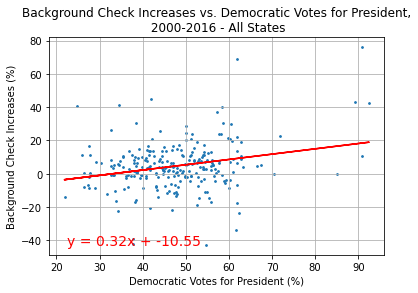

In [23]:
x_values = compare["PercentD"]
y_values = compare["pct"]

plt.scatter(compare["PercentD"],compare["pct"],s=3)
plt.title("Background Check Increases vs. Democratic Votes for President,\n 2000-2016 - All States")
plt.ylabel("Background Check Increases (%)")
plt.xlabel("Democratic Votes for President (%)")
plt.grid()
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(min(x_values)+0.5,min(y_values)),fontsize=14,color="red")
plt.show()

In [24]:
print(f"The r-squared is {r_value * r_value}")

The r-squared is 0.06367668327929817


In [25]:
red_states = stategroups.loc[stategroups["Group"] == "Red", "State"]
red_states

0     AK
1     AL
2     AR
3     AZ
10    GA
13    ID
16    KS
17    KY
18    LA
24    MO
25    MS
26    MT
28    ND
29    NE
36    OK
40    SC
41    SD
42    TN
43    TX
44    UT
49    WV
50    WY
Name: State, dtype: object

In [26]:
blue_states = stategroups.loc[stategroups["Group"] == "Blue", "State"]
blue_states

4     CA
6     CT
7     DC
8     DE
11    HI
14    IL
19    MA
20    MD
21    ME
23    MN
31    NJ
34    NY
37    OR
39    RI
46    VT
47    WA
Name: State, dtype: object

In [27]:
swing_states = stategroups.loc[stategroups["Group"] == "Swing", "State"]
swing_states

5     CO
9     FL
12    IA
15    IN
22    MI
27    NC
30    NH
32    NM
33    NV
35    OH
38    PA
45    VA
48    WI
Name: State, dtype: object

In [38]:
red_all = compare
for state in blue_states:
    red_all = red_all.loc[red_all
                        ["State"] != state]
for state in swing_states:
    red_all = red_all.loc[red_all["State"] != state]
red_all.shape

(110, 11)

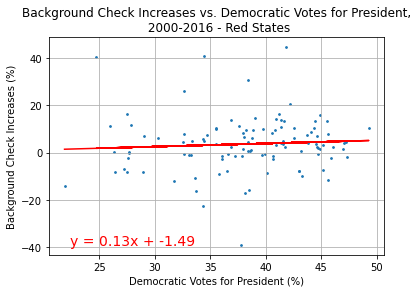

In [39]:
x_values = red_all["PercentD"]
y_values = red_all["pct"]

plt.scatter(red_all["PercentD"],red_all["pct"],s=3)
plt.title("Background Check Increases vs. Democratic Votes for President,\n 2000-2016 - Red States")
plt.ylabel("Background Check Increases (%)")
plt.xlabel("Democratic Votes for President (%)")
plt.grid()
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(min(x_values)+0.5,min(y_values)),fontsize=14,color="red")
plt.show()

In [40]:
print(f"The r-squared is {r_value * r_value}")

The r-squared is 0.004813825381268841
